In [4]:
from matplotlib import pyplot as plt
import numpy as np
import Functions_data_analysis as fda
import Functions_plotting as fp
from Datasets import exp_set_dict_warm_order
from Functions_load_output import load_experiment_ds
import xmitgcm

In [5]:
exp_set = 'ic_2001'
prefix = 'iceshelf_state_set2' 
runs = exp_set_dict_warm_order[exp_set]
print('Using runs in this order:\n',runs)

Using runs in this order:
 ['run_forc_erai_1982_rep_ic_2001', 'run_forc_erai_1984_rep_ic_2001', 'run_forc_erai_1989_rep_ic_2001', 'run_forc_erai_1992_rep_ic_2001', 'run_forc_erai_1994_rep_ic_2001', 'run_forc_erai_2003_rep_ic_2001', 'run_forc_erai_2009_rep_ic_2001', 'run_forc_erai_1991_rep_ic_2001', 'run_forc_erai_2015_rep_ic_2001', 'run_forc_erai_2011_rep_ic_2001']


In [32]:
exp_name = runs[0]
iters = 'all'
# iters = ['810720']
casper_dir = '/glade/campaign/univ/ulnl0002/Gemma/AS_climBC_5yr_exp/'
run_path = casper_dir + exp_name + '/diags/'
grid_dir = casper_dir + 'input/'
# run_path = '/glade/campaign/univ/ulnl0002/Gemma/AS_climBC_control/run/diags/'
prefix = 'iceshelf_state_set2' 
# prefix = 'EXF_forcing_set2'
run_ds = xmitgcm.open_mdsdataset(run_path, \
         grid_dir = grid_dir,\
         iters = iters,\
         prefix = prefix, delta_t=120, ref_date = '1992-01-01',\
         calendar='noLeap')

In [33]:
run_ds

<xarray.Dataset>
Dimensions:   (XC: 416, YC: 896, XG: 416, YG: 896, Z: 70, Zp1: 71, Zu: 70,
               Zl: 70, time: 60)
Coordinates: (12/30)
  * XC        (XC) >f4 -140.0 -140.0 -140.0 -140.0 ... -137.5 -137.5 -137.4
  * YC        (YC) >f4 -65.34 -65.34 -65.34 -65.34 ... -65.34 -65.34 -65.34
  * XG        (XG) >f4 -140.0 -140.0 -140.0 -140.0 ... -137.5 -137.5 -137.5
  * YG        (YG) >f4 -65.33 -65.33 -65.33 -65.33 ... -65.33 -65.33 -65.33
  * Z         (Z) >f4 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 ... -5.244e+03 -5.678e+03 -6.134e+03
    ...        ...
    maskC     (Z, YC, XC) bool dask.array<chunksize=(70, 896, 416), meta=np.ndarray>
    maskW     (Z, YC, XG) bool dask.array<chunksize=(70, 896, 416), meta=np.ndarray>
    maskS     (Z, YG, XC) bool dask.array<chunksize=(70, 896, 416), meta=np.ndarray>
    rhoRef    (Z) >f4 dask.array<chunksize=(70,), meta=np.ndarray>
    iter      (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time      (time) object 2001-02-01 00:00:00 ... 2006-01-01 00:00:00
Data variables:
    SHIfwFlx  (time, YC, XC) float32 dask.array<chunksize=(1, 896, 416), meta=np.ndarray>
    SHIhtFlx  (time, YC, XC) float32 dask.array<chunksize=(1, 896, 416), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir='/glade/campai...

In [34]:
# populate lat/lon grid in place of XC/YC
# Load grid (see documentation in saved PDF: mitgcm.pdf)
# XC, YC - grid cell center point locations
x_fname = grid_dir+'/XC.data'
f = open(x_fname,'r')
xc = np.fromfile(f,dtype = '>f')
xc_rs = xc.reshape([896,-1]) #array of shape 896,416
lons = xc_rs[:,0] #nd array of shape 896

y_fname = grid_dir+'YC.data'
f = open(y_fname,'r')
yc = np.fromfile(f,dtype = '>f')
yc_rs = yc.reshape([896,-1])
lats = yc_rs[0,:] #ndarray of shape 416

# XG, YG - locations of grid cell vertices (used in some velocity fields)
xg_fname = grid_dir+'XG.data'
f = open(xg_fname,'r')
xg = np.fromfile(f,dtype = '>f')
xg_rs = xg.reshape([896,-1]) #array of shape 896,416
lons_f = xg_rs[:,0] #nd array of shape 896

yg_fname = grid_dir+'YG.data'
f = open(yg_fname,'r')
yg = np.fromfile(f,dtype = '>f')
yg_rs = yg.reshape([896,-1]) #array of shape 896,416
lats_f = yg_rs[0,:] #nd array of shape 896

# RC, RF - vertical cell center and cell faces positions
r_fname = grid_dir+'RC.data'
f = open(r_fname,'r')
depths = np.fromfile(f,dtype = '>f')

rw_fname = grid_dir+'RF.data'
f = open(rw_fname,'r')
depths_w = np.fromfile(f,dtype = '>f')

# Rename grid vars

# # X and Y are technically lon and lat, but the ASBS grid is sideways. 
run_ds = run_ds.rename({'XC':'lat', 'YC':'lon', 'Z':'depth',\
                        'XG':'lat_at_f_loc','YG':'lon_at_f_loc',\
                        'Zl':'depth_at_lower_w_loc'})
run_ds['lat'] = lats
run_ds['lon'] = lons
run_ds['lat_at_f_loc'] = lats_f
run_ds['lon_at_f_loc'] = lons_f
run_ds['depth'] = depths
run_ds['depth_at_lower_w_loc'] = depths_w[1:]

In [35]:
run_ds

<xarray.Dataset>
Dimensions:               (lat: 416, lon: 896, lat_at_f_loc: 416,
                           lon_at_f_loc: 896, depth: 70, Zp1: 71, Zu: 70,
                           depth_at_lower_w_loc: 70, time: 60)
Coordinates: (12/30)
  * lat                   (lat) >f4 -65.34 -65.38 -65.41 ... -76.46 -76.48 -76.5
  * lon                   (lon) >f4 -140.0 -139.9 -139.8 ... -65.46 -65.38
  * lat_at_f_loc          (lat_at_f_loc) >f4 -65.33 -65.36 ... -76.47 -76.49
  * lon_at_f_loc          (lon_at_f_loc) >f4 -140.0 -139.9 ... -65.5 -65.42
  * depth                 (depth) >f4 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * Zp1                   (Zp1) >f4 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
    ...                    ...
    maskC                 (depth, lon, lat) bool dask.array<chunksize=(70, 896, 416), meta=np.ndarray>
    maskW                 (depth, lon, lat_at_f_loc) bool dask.array<chunksize=(70, 896, 416), meta=np.ndarray>
    maskS                 (depth, lon_at_f_loc, lat) bool dask.array<chunksize=(70, 896, 416), meta=np.ndarray>
    rhoRef                (depth) >f4 dask.array<chunksize=(70,), meta=np.ndarray>
    iter                  (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) object 2001-02-01 00:00:00 ... 2006-01-01 00...
Data variables:
    SHIfwFlx              (time, lon, lat) float32 dask.array<chunksize=(1, 896, 416), meta=np.ndarray>
    SHIhtFlx              (time, lon, lat) float32 dask.array<chunksize=(1, 896, 416), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir='/glade/campai...

In [36]:
ht = run_ds.SHIhtFlx
ht

<xarray.DataArray 'SHIhtFlx' (time: 60, lon: 896, lat: 416)>
dask.array<concatenate, shape=(60, 896, 416), dtype=float32, chunksize=(1, 896, 416), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) >f4 -65.34 -65.38 -65.41 -65.45 ... -76.46 -76.48 -76.5
  * lon      (lon) >f4 -140.0 -139.9 -139.8 -139.7 ... -65.54 -65.46 -65.38
    rA       (lon, lat) >f4 dask.array<chunksize=(896, 416), meta=np.ndarray>
    Depth    (lon, lat) >f4 dask.array<chunksize=(896, 416), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) object 2001-02-01 00:00:00 ... 2006-01-01 00:00:00
Attributes:
    standard_name:  ice_shelf_upward_heat_flux
    long_name:      Ice shelf heat flux (positive upward)
    units:          W m-2

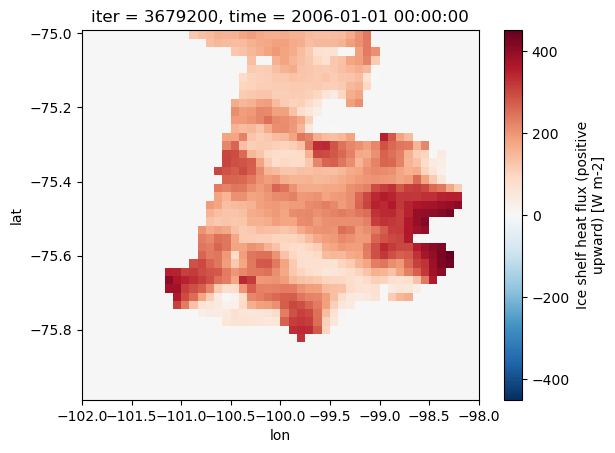

In [42]:
ht_pig = ht.sel(lat=slice(-75,-76), lon =slice(-102,-98))
ht_pig[-1].transpose().plot()

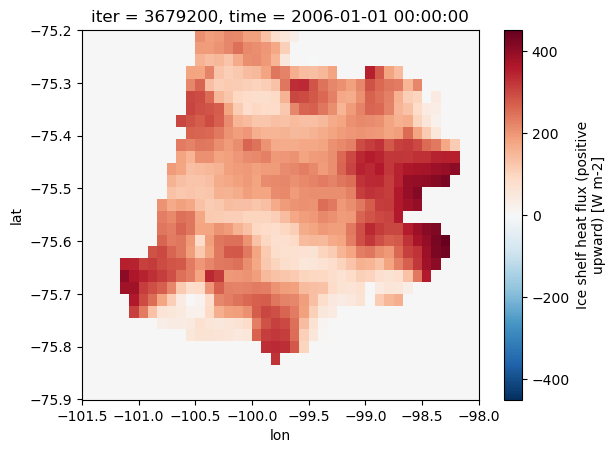

In [65]:
ht_pig = ht.sel(lat=slice(-75.2,-75.9), lon =slice(-101.5,-98))
ht_pig[-1].transpose().plot()

In [50]:
ht_pig_mean = ht_pig[-1].mean(dim='lat')
ht_pig_mean.values

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.0130123e-02,
       4.2034351e+01, 6.5141052e+01, 5.5417179e+01, 5.9521408e+01,
       8.7979111e+01, 9.5777962e+01, 1.1482115e+02, 1.4263658e+02,
       1.3174005e+02, 1.4467303e+02, 1.5372740e+02, 1.4414110e+02,
       1.3940930e+02, 1.3802385e+02, 1.4200107e+02, 1.5204391e+02,
       1.6125342e+02, 1.5645578e+02, 1.6242531e+02, 1.4748079e+02,
       1.3279958e+02, 1.2684940e+02, 1.2296813e+02, 1.2145601e+02,
       1.3471329e+02, 1.6273640e+02, 1.7044356e+02, 1.7209317e+02,
       1.6442523e+02, 1.7235469e+02, 1.6297481e+02, 1.6778714e+02,
       1.2965341e+02, 1.1875277e+02, 8.2586243e+01, 3.2032421e+01,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [61]:
np.mean(ht_pig_mean[3:-2]).values

array(124.632164, dtype=float32)

In [58]:
np.mean(ht_pig_mean).values

array(109.795006, dtype=float32)

In [60]:
# Compute mean excluding zeros
np.mean(ht_pig_mean[ht_pig_mean != 0]).values

array(124.632164, dtype=float32)